## Initialize python imports, notebook window width,  and graphics window position
Executed automatically on start or restart.

In [1]:
%gui osx
import random as rand
import numpy as np
import time
import genelife as g

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

# 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))     # sets input cells to use full window width

from os import environ
environ['SDL_VIDEO_WINDOW_POS'] = "%d,%d" % (1000,32)   # set position of pygame (SDL) video window (x,y) pixel coords, values work well on iMac


Running with SDL version 2.0.9.


In [2]:
def set_death(rate,ver=3):   # ver=1: random ver=2: gol ver=3: death, ver=4: s-dependent death
    if rate > 1:
        rate = 1
    if rate < 0:
        rate = 0
    rbackground = int(rate*32768)
    # set_rbackground 2nd arg:  randomsoup (3 deletions only, 2 GoL gene, 1 random gene:")
    g.genelife.set_rbackground(rbackground,ver) # 4=> s-dependent

## Selection 11 Distance distinguishing LUT encoded by gene with variable length encoding

In [4]:
# 11
#  selection=11 LUT with appropriate parameters for survival
#  this case uses the genes to encode the se (number of live edge-centred sites) and s dept rule tables for birth and survival
#  a variable length encoding is used in the gene with 4+4 bits, 4-bits for the survival and birth s value as in 8, and 4 bits for the se value
#  there are 1,2,3,4,5,4,3,2,1 configurations of se for s=0-8. Only 19 cases s=2-6 are lut allowed non-zero.
#  birth is determined by the and of the live neighbour genes (and 19 bits of overwritemask) ie genecode
#  survival is determined the and of the live neighbour genes (and 19 bits of survivalmask) ie genecode
#  ncoding not used : only space for 1 bit per lut entry
#  this example starts with only allowing GoL configurations : extend by adding more bits to survival and birth masks
g.nrun=1; g.ndisp=1000; g.nskip=0; g.niter=1;# simulation time stepping parameters
g.nhist = 0                                  # set to n to turn on histogram configurations every nth step
g.nstat = 0                                  # set to n to turn on statistics trace every nth step
g.rulemod = g.runparams[0] = 5               # 0,1 whether to allow GoL rule modifications
                                             # with rulemod 1 2-live-nb birth, 3-live-nb non-birth & non-survival possible
g.repscheme = g.runparams[1] = 0x0610        # repscheme bit 3 (val 0x8) determines whether random choice of ancestor amongst live neighbours
                                             # repscheme mod 8 i.e. 0-7 determines selection scheme based on gene
                                             # 0 minimum gene as value  # 1 maximum gene as value
                                             # 2 minimum number of ones # 3 maximum number of ones
                                             # 4 neutral selection # 5 neutral but different selection
                                             # 6 penalty function -1 for a survival rule -2 for a birth rule  # 7 not allowed 
g.selection     = g.runparams[2] = 11        # fitness for 2 live neighbor rule : 0-6 see subgenelife.c code
g.overwritemask = g.runparams[3] = 0xffff
g.overwritemask = g.runparams[3] = 0x00
g.birthmask    = g.runparams[7] = 0x000001e0 # for selection=10-13 this is the GoL birth mask
g.birthmask    = g.runparams[7] = 0x000001e2 # for selection=10-13 this is the GoL birth mask
g.birthmask    = g.runparams[7] = 0x000001e2 # for selection=10-13 this is the GoL birth mask
g.birthmask    = g.runparams[4] = 0x0 # for selection=10-11 this is the GoL birth mask
g.birthmask    = g.runparams[4] = 0x007fffff # for selection=10-11 this is the GoL birth mask
g.birthmask    = g.runparams[4] = 0x007fffff # for selection=10-11 this is the GoL birth mask
g.birthmask    = g.runparams[4] = 0x007ffffc # for selection=10-11 this is the GoL birth mask

g.survivalmask = g.runparams[4] = 0x000001fc # for selection=10-11 this is the GoL survival mask
g.survivalmask = g.runparams[4] = 0x007fffff # for selection=10-11 this is the GoL survival mask
g.survivalmask = g.runparams[4] = 0x00000 # for selection=10-11 this is the GoL survival mask




g.colorfunction = g.runparams[5] = 0         # color function 0(hash), ≥1(fnal), 2 nongulstate or color gol planes, 3 notgolrul yellow
                                             # 4 activities 5 genealogy steps 6 genealogy temporal 7 activity scaled colors
g.initfield = g.runparams[6] = 200           # 1 init via 32x32 genepat.dat, n>1 init via nxn rand array
g.nlog2pmut = g.simparams[0] = 8             # log2 gene mutation probability (0 or >56 means no mutation)
g.initial1density = g.simparams[1] =  16384  # initial 1 density in GOL state
                                             # 16384 = nearest to half of guaranteed C rand max value 32767 = 2**15 - 1
g.initialrdensity = g.simparams[2] = 16384       # initial density of random genes
g.ncoding = g.simparams[3] = 1               # for selection 10, non zero value means grow plane community from 0
                                             # otherwise (selection<10) no of bits used to encode valid connection functions 1-16
                                             # for selection==8, lut, ncoding 1,2,3 bits per lut entry : 0 implies 3.
g.startgenechoice = g.simparams[4] = 8       # initialize genes to startgene number 0-8 : 8 is random choice of 0-7
g.ranseed = g.simparams[5] = 2
g.genelife.initialize_planes(g.npoffsets)
g.genelife.initialize(g.runparams,g.simparams)
g.framenr = 0
g.cnt=0
g.show0()
# step()
set_death(0.015)
g.run(g.nrun, g.ndisp, g.nskip, g.niter, g.nhist, g.nstat, False)

step 187 vscrolling changed to  0


In [7]:
g.run(g.nrun, g.ndisp, g.nskip, g.niter, g.nhist, g.nstat, False,100)

step 1064 pixel data (250,249) gol 0000000000000000 gene 0000000000000000 status 0000000000000000
step 1064 pixel data (250,249) gol 0000000000000000 gene 0000000000000000 status 0000000000000000


In [1]:
gol = np.zeros(g.N2,np.uint64)
golg = np.zeros(g.N2,np.uint64)
g.genelife.get_curgol(gol)
g.genelife.get_curgolg(golg)

NameError: name 'np' is not defined

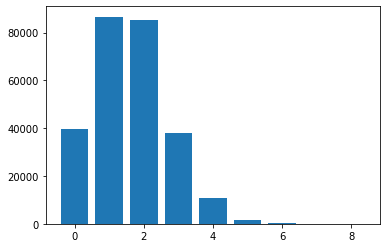

In [4]:
#g.run(g.nrun, g.ndisp, g.nskip, g.niter, g.nhist, g.nstat, False)
shist=np.zeros(9,np.int32)
g.genelife.get_shist(shist)
bars = list(range(9))
ypos = np.arange(len(bars))
plt.bar(ypos,shist);

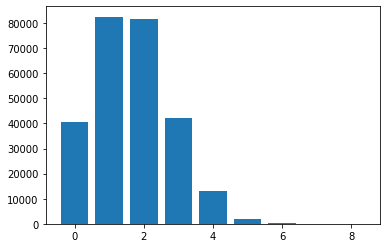

In [7]:
#g.run(g.nrun, g.ndisp, g.nskip, g.niter, g.nhist, g.nstat, False)
shist=np.zeros(9,np.int32)
g.genelife.get_shist(shist)
bars = list(range(9))
ypos = np.arange(len(bars))
plt.bar(ypos,shist);

### old sec. 5.2

In [ ]:
# 2
#  selection=2 scissors-stone-well-paper
#  Note that sequences must differ for replication unless it is forced.
#  
#  Color scheme: four different classes are red, green, blue and white
g.nrun=1; g.ndisp=1000; g.nskip=0; g.niter=100;  # simulation time stepping parameters
#nrun=1; ndisp=1; nskip=0; niter=1;         # single step
g.nhist = 10                                # set to n to turn on histogram configurations every nth step
g.nstat = 10                                # set to n to turn on statistics trace every nth step
g.rulemod = g.runparams[0] = 1              # 0,1 whether to allow GoL rule modifications
                                            # with rulemod 1 2-live-nb birth, 3-live-nb non-birth & non-survival possible
g.repscheme = g.runparams[1] = 0x0002       # bits 0 to 20 code for mostly independent binary options
g.selection = g.runparams[2] = 2            # fitness for 2 live neighbor rule : 0-6 see subgenelife.c code
g.overwritemask = g.runparams[3] = 3        # mask of 2 bits to overwrite instead of survival for 3(bit0) or 2(bit1) live nbs
g.survivalmask = g.runparams[4] = 0         # survive mask for two (bit 1) and three (bit 0) live neighbours : GoL = 3
g.colorfunction = g.runparams[5] = 0        # color function 0(hash), ≥1(fnal), 2 nongolchg yellow, 3 notgolrul yellow
g.initfield = g.runparams[6] = 100          # 1 init via 32x32 genepat.dat, n>1 init via nxn rand array
g.nlog2pmut = g.simparams[0] = 8            # log2 gene mutation probability (0 or >56 means no mutation)
g.initial1density = g.simparams[1] = 8192   # initial 1 density in GOL state
                                            # 16384 = nearest to half of guaranteed C rand max value 32767 = 2**15 - 1
g.initialrdensity = g.simparams[2] = 0          # initial density of random genes
g.ncoding = g.simparams[3] = 0                  # no of bits used to encode valid connection functions 1-16
g.startgenechoice = g.simparams[4] = 8          # initialize genes to startgene number 0-8 : 8 is random choice of 0-7

g.genelife.initialize_planes(g.npoffsets)
g.genelife.initialize(g.runparams,g.simparams)
g.framenr = 0
g.cnt=0
g.show0(False)
#g.step()
set_death(0.015)
g.run(g.nrun, g.ndisp, g.nskip, g.niter, g.nhist, g.nstat, False)

## Reset for repeated runs

In [ ]:
g.initfield = g.runparams[6] =   100 
g.genelife.initialize(g.runparams,g.simparams)
for i in range(300):
    g.genelife.genelife_update(1, 0,0)
    g.show0()

In [25]:
g.genelife.set_stash()
g.initfield = g.runparams[6] = -1   # use stashed vals

In [40]:

for i in range(10):
    g.genelife.initialize(g.runparams,g.simparams)
    for j in range(50):
        g.genelife.genelife_update(1, 0,0)
        g.show0()
    print(i)
    #time.sleep(3)



0
1
2
3
4
5
6
7
8
9


## Vary death rate

In [27]:
g.genelife.set_stash()
g.initfield = g.runparams[6] = -1   # use stashed vals

#### Take a look...

Let `deathrate` range between 0 and 1, using `set_death` to set the corresponding rbackground value.  

In cell below note:
* transition from all death to not all death happens between deathrate=0.8 and deathrate=0.4.
* as deathrate is varied, specifically for much lower values, the death perturbation enables niches for new genomes / dynamics (e.g. static walls)
* setting `g.colorfunction = g.runparams[5] = 4` yields activity waves.  deathrate=0.8 still generates plenty of waves.  maybe bug in death perturbation incrementing activity for dead stuff?

In [42]:
g.colorfunction = g.runparams[5] = 0         # color function 0(hash), ≥1(fnal), 2 nongulstate or color gol planes, 3 notgolrul yellow

deathrate = 0.8
for i in range(10):
    g.genelife.initialize(g.runparams,g.simparams)
    set_death(deathrate)
    print(i,deathrate)
    for j in range(200):
        g.genelife.genelife_update(1, 0,0)
        g.show0()
    deathrate=deathrate/2
    #time.sleep(3)

0 0.8
1 0.4
2 0.2
3 0.1
4 0.05
5 0.025
6 0.0125
7 0.00625
8 0.003125
9 0.0015625


## Death vs time

Initialize for ~400 time steps...

In [4]:
g.genelife.set_stash()
g.initfield = g.runparams[6] = -1   # use stashed vals

In [10]:
N = 200
Ninc = 10
dat = [[None for _ in range(N)] for __ in range(Ninc)]

deathmx = 0.8
deathmn = 0.5
deathinc = (deathmx-deathmn)/Ninc
deathrate = deathmx
for i in range(Ninc):
    g.genelife.initialize(g.runparams,g.simparams)
    set_death(deathrate)
    print(i,deathrate)
    for j in range(N):
        dat[i][j] = g.genelife.get_nlive()
        g.genelife.genelife_update(1, 0,0)
        g.show0()
    deathrate = deathrate - deathinc


0 0.8
1 0.77
2 0.74
3 0.71
4 0.6799999999999999
5 0.6499999999999999
6 0.6199999999999999
7 0.5899999999999999
8 0.5599999999999998
9 0.5299999999999998


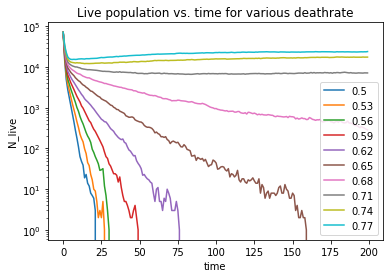

In [26]:
xx = [deathmn+deathinc*i for i in range(len(dat))]
for i in range(len(dat)):
    plt.semilogy(dat[i],label=np.round(xx[i],3))
plt.legend()
plt.xlabel('time')
plt.ylabel('N_live')
plt.title('Live population vs. time for various deathrate')
plt.show();


Death threshold $d_{th} = $
